In [1]:
from math import log
import random
import numpy as np
import cvxpy as cp
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams['font.size'] = 14.0
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams.update({'mathtext.default': 'regular' })

In [3]:
def f(c, x):
    return c @ x

In [4]:
def CVX(A, b, c):
    
    x = cp.Variable(n)
    
    prob = cp.Problem(
        cp.Minimize(f(x, c)),
        [A @ x == b, x >= 0]
    )
    
    prob.solve()
    
    return x.value, prob.value

In [5]:
def ADMM(A, b, c, r, f_opt, close=0.0001):
    
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    
    A_pinv = np.linalg.pinv(A)
    
    f_curr = float('inf')
    
    k = 0
    
    differences = []
    
    while abs(f_curr - f_opt) >= close:
        
        q_tilda = z - (1/r) * (y + c)
        x = q_tilda - A_pinv @ (A @ q_tilda - b)
        
        l = x + (1/r) * y
        z = np.maximum(l, 0)
        
        y = y + r * (x - z)
        
        f_curr = f(z, c)
        
        k += 1
        
        differences.append(abs(f_curr - f_opt))
        
    return x, z, differences

$A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^{m}$, $c \in \mathbb{R}^{n}$ and $x_s \in \mathbb{R}^n$

## m = 10, n = 100

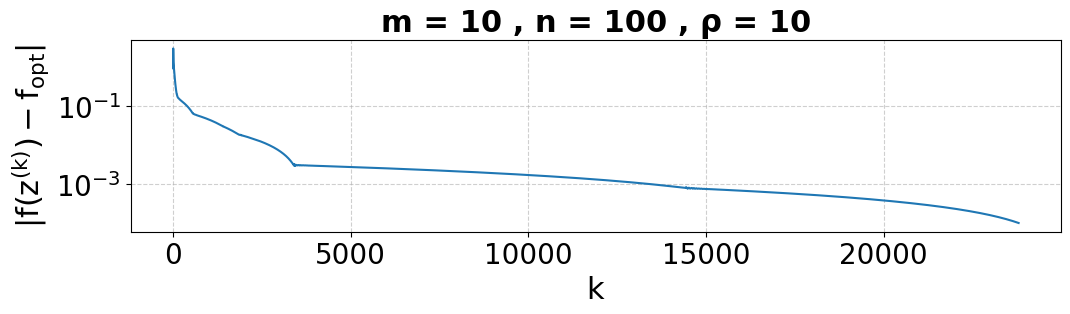

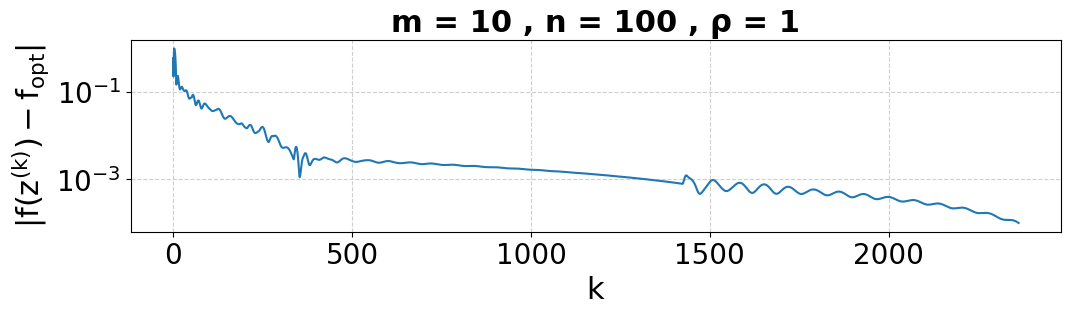

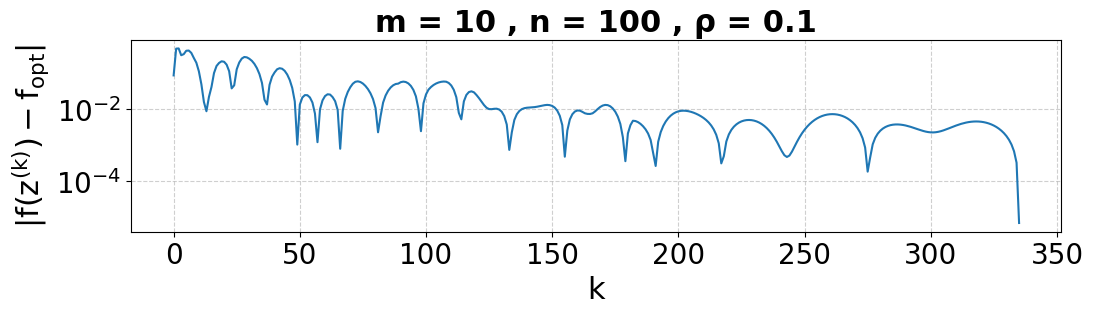

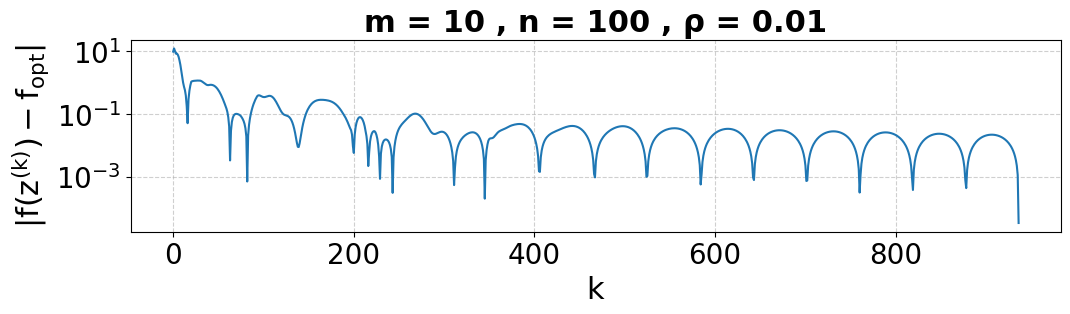

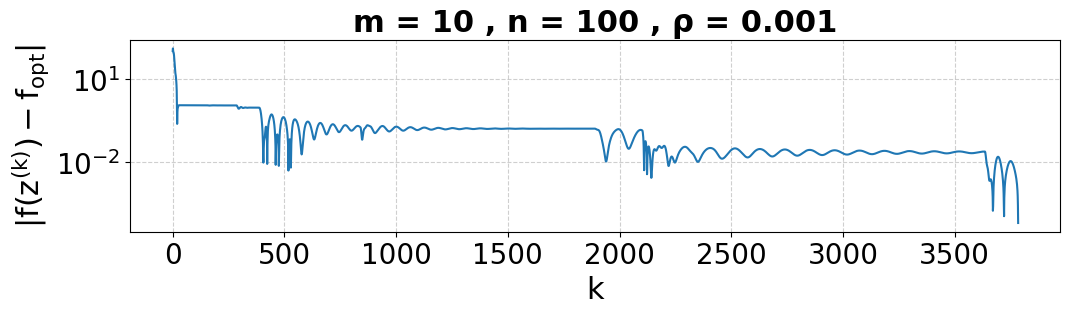

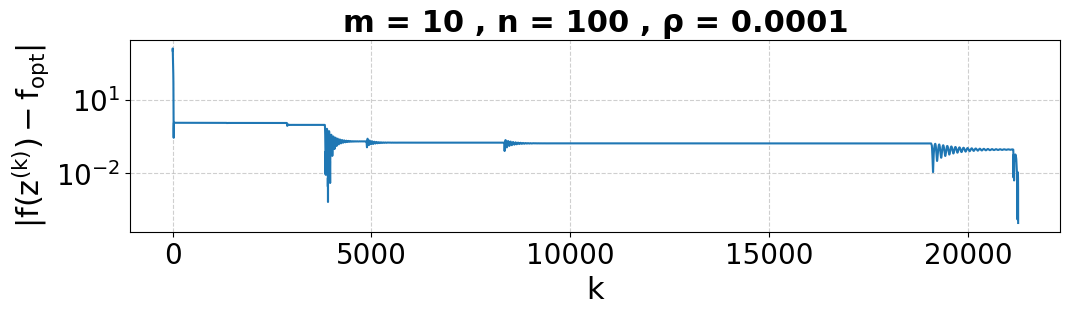

In [6]:
all_differences = []

for m, n, r in [(10, 100, 10), (10, 100, 1), (10, 100, 0.1), (10, 100, 0.01), (10, 100, 0.001), (10, 100, 0.0001)]:
    np.random.seed(44)
    random.seed(44)

    A = np.random.randn(m, n)
    c = np.random.rand(n)

    x_sol = np.random.rand(n)

    b = A @ x_sol

    x_cvx, f_cvx = CVX(A, b, c)

    x_admm, z_admm, differences = ADMM(A, b, c, r, f_cvx)
    
    all_differences.append(differences)

    pdf = PdfPages(f'plots/2.1_admm_{m}_{n}_{r}.pdf')
    plt.figure(figsize=(12, 3))

    k = [i for i in range(len(differences))]

    plt.plot(k, differences)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.6)

    # Label the axes
    plt.xlabel('$k$')
    plt.ylabel('$|f(z^{(k)}) - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    plt.subplots_adjust(bottom=0.24)

    plt.title(f"m = {m} , n = {n} , ρ = {r}")

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()

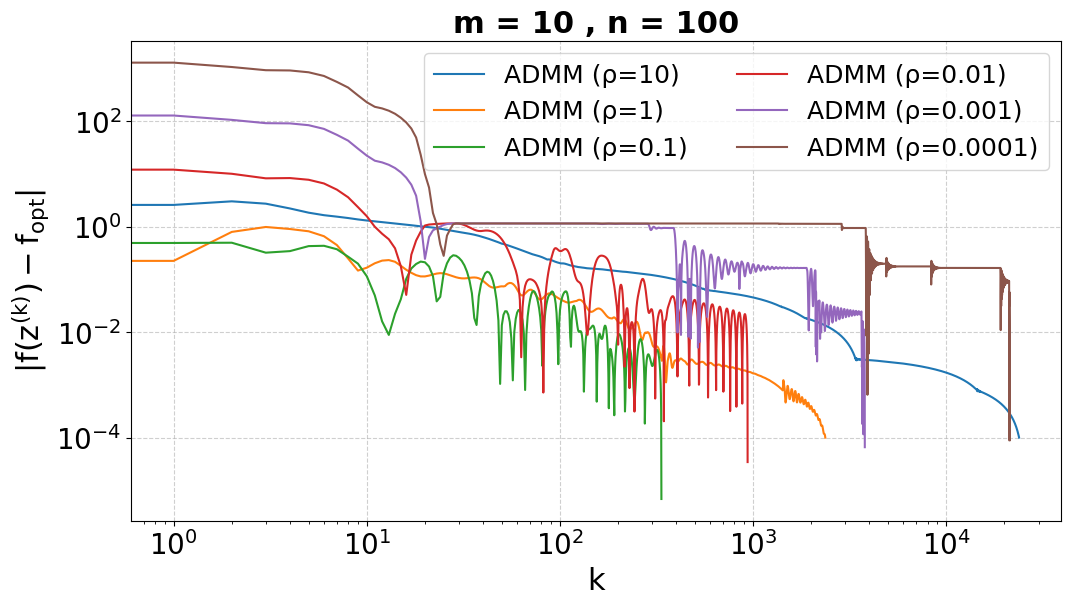

In [7]:
i = 0

pdf = PdfPages(f'plots/2.1_admm_ALL_10_100.pdf')
plt.figure(figsize=(12, 6))

for m, n, r in [(10, 100, 10), (10, 100, 1), (10, 100, 0.1), (10, 100, 0.01), (10, 100, 0.001), (10, 100, 0.0001)]:
    
    k = [i for i in range(len(all_differences[i]))]

    plt.plot(k, all_differences[i], label=f'ADMM (ρ={r})')
    
    i += 1

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(ncols=2)

# Label the axes
plt.xlabel('$k$')
plt.ylabel('$|f(z^{(k)}) - f_{opt}|$')

plt.xscale('log')
plt.yscale('log')

plt.title(f"m = {m} , n = {n}")

plt.subplots_adjust(bottom=0.12, top=0.92)

pdf.savefig(plt.gcf()) # Save the current figure
plt.show()
plt.close()
pdf.close()

## m = 200, n = 500

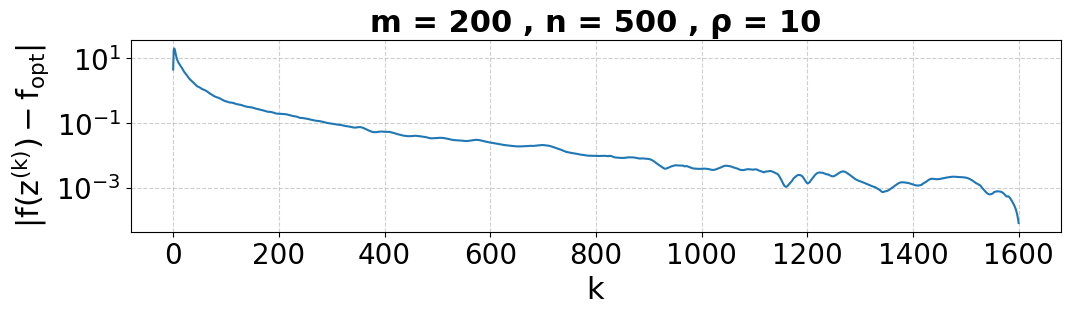

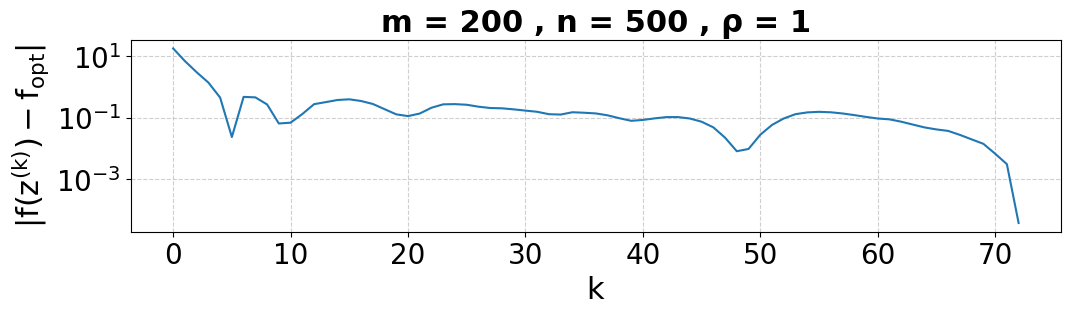

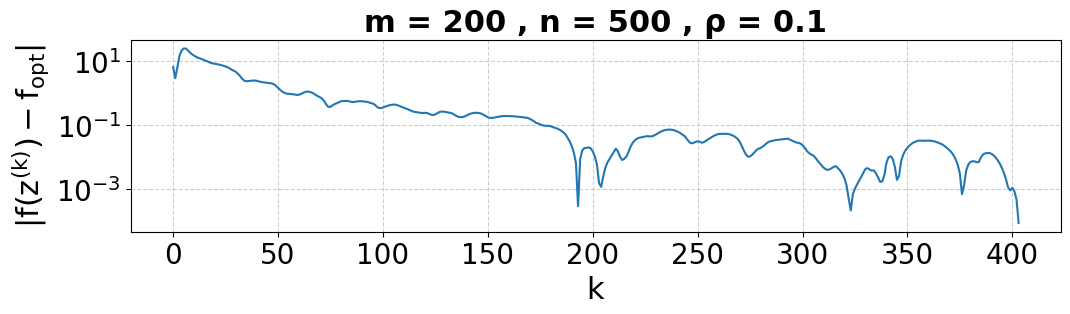

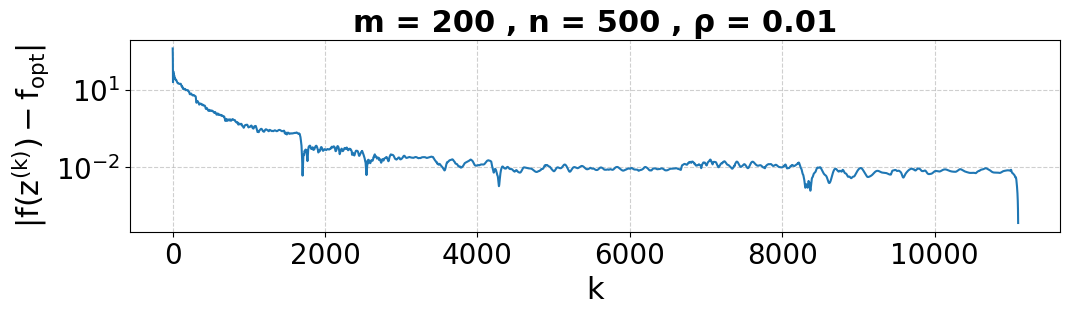

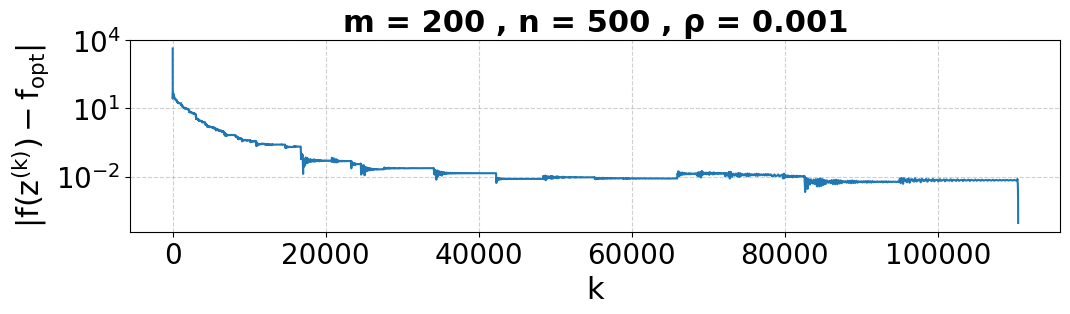

In [8]:
all_differences = []

for m, n, r in [(200, 500, 10), (200, 500, 1), (200, 500, 0.1), (200, 500, 0.01), (200, 500, 0.001)]:
    np.random.seed(44)
    random.seed(44)

    A = np.random.randn(m, n)
    c = np.random.rand(n)

    x_sol = np.random.rand(n)

    b = A @ x_sol

    x_cvx, f_cvx = CVX(A, b, c)

    x_admm, z_admm, differences = ADMM(A, b, c, r, f_cvx)
    
    all_differences.append(differences)

    pdf = PdfPages(f'plots/2.1_admm_{m}_{n}_{r}.pdf')
    plt.figure(figsize=(12, 3))

    k = [i for i in range(len(differences))]

    plt.plot(k, differences)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.6)

    # Label the axes
    plt.xlabel('$k$')
    plt.ylabel('$|f(z^{(k)}) - f_{opt}|$')

    #plt.xscale('log')
    plt.yscale('log')

    plt.subplots_adjust(bottom=0.24)

    plt.title(f"m = {m} , n = {n} , ρ = {r}")

    pdf.savefig(plt.gcf()) # Save the current figure
    plt.show()
    plt.close()
    pdf.close()

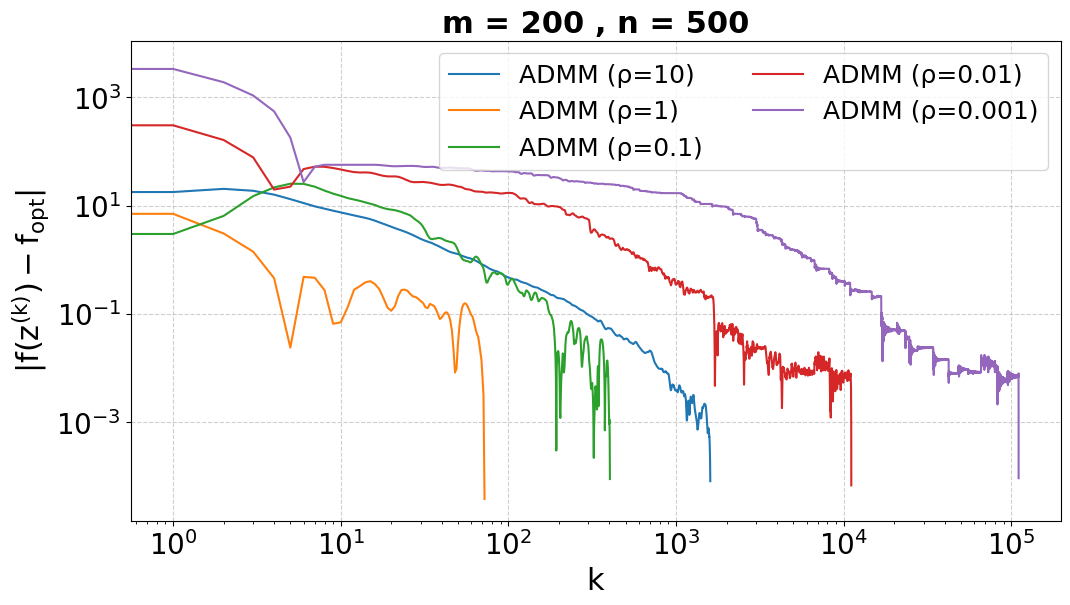

In [9]:
i = 0

pdf = PdfPages(f'plots/2.1_admm_ALL_200_500.pdf')
plt.figure(figsize=(12, 6))

for m, n, r in [(200, 500, 10), (200, 500, 1), (200, 500, 0.1), (200, 500, 0.01), (200, 500, 0.001)]:
    
    k = [i for i in range(len(all_differences[i]))]

    plt.plot(k, all_differences[i], label=f'ADMM (ρ={r})')
    
    i += 1

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(ncols=2)

# Label the axes
plt.xlabel('$k$')
plt.ylabel('$|f(z^{(k)}) - f_{opt}|$')

plt.xscale('log')
plt.yscale('log')

plt.title(f"m = {m} , n = {n}")

plt.subplots_adjust(bottom=0.12, top=0.92)

pdf.savefig(plt.gcf()) # Save the current figure
plt.show()
plt.close()
pdf.close()